In [1]:
NICKNAME = "Goshaan4k"

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def euler_solve(lam, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*lam*y[k]
    return tt, y

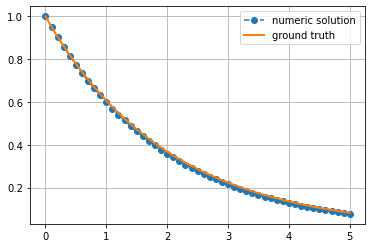

In [4]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

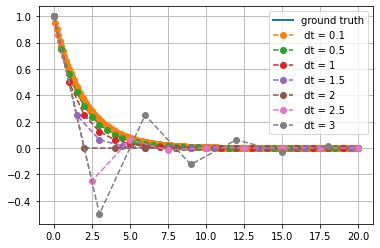

In [5]:
plt.figure()
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
for dt in [0.1, 0.5, 1, 1.5, 2, 2.5,  3]:
    tt, y = euler_solve(lam, u0=1.0, T=20, dt=dt)
    plt.plot(tt, y, 'o--', label=f' dt = {dt}')
plt.legend(loc='best')
plt.grid(True)

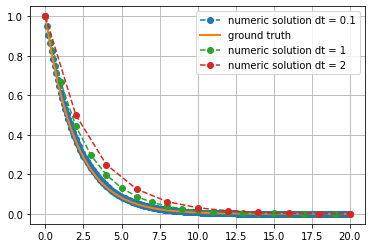

In [6]:
def Implicit_Euler(lam, u0, T, dt):
    num_steps = int(T / dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] / (1 - lam * dt)
    return tt, y

plt.figure()
lam = -0.5
tt, y = Implicit_Euler(lam, u0=1.0, T=20, dt=0.1)
plt.plot(tt, y, 'o--', label='numeric solution dt = 0.1')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
tt, y = Implicit_Euler(lam, u0=1.0, T=20, dt=1)
plt.plot(tt, y, 'o--', label='numeric solution dt = 1')
tt, y = Implicit_Euler(lam, u0=1.0, T=20, dt=2)
plt.plot(tt, y, 'o--', label='numeric solution dt = 2')
plt.legend(loc='best')
plt.grid(True)

In [7]:
def matrixEuler(A, u0, T, dt):
    t = np.arange(0, T + dt, dt)
    y = np.zeros((len(u0), len(t)))
    y[:, 0] = u0
    for ind in range(len(t[:len(t) - 1])):
        y[:, ind + 1] = y[:, ind] + dt * A @ y[:, ind]
    return t, y

Собственные значения A:  [  -9.34647667 -499.65352333]


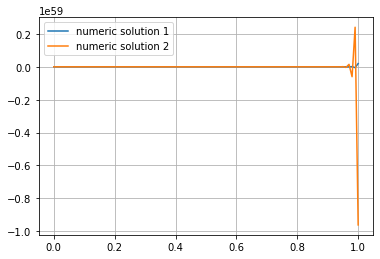

In [8]:
plt.figure()
A = np.array([[-10, 10], [32, -499]])
u0 = np.reshape([1, 0], (2,))
t, y = matrixEuler(A, u0, T=1, dt=0.01)
plt.plot(t, y[0], '-', label='numeric solution 1')
plt.plot(t, y[1], '-', label='numeric solution 2')
plt.legend(loc='best')
plt.grid(True)
print("Собственные значения A: ", np.linalg.eigvals(A))

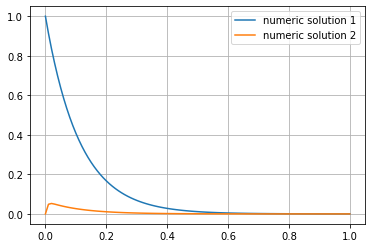

In [9]:
def Implicit_matrixEuler(A, u0, T, dt):
    t = np.arange(0, T + dt, dt)
    y = np.zeros((len(u0), len(t)))
    y[:, 0] = u0
    B = np.eye(2) - dt * A
    for ind in range(len(t[:len(t) - 1])):
        y[:, ind + 1] = np.linalg.solve(B, y[:, ind])
    return t, y

plt.figure()
A = np.array([[-10, 10], [32, -499]])
u0 = np.reshape([1, 0], (2,))
t, y = Implicit_matrixEuler(A, u0, T=1, dt=0.01)
plt.plot(t, y[0], '-', label='numeric solution 1')
plt.plot(t, y[1], '-', label='numeric solution 2')
plt.legend(loc='best')
plt.grid(True)

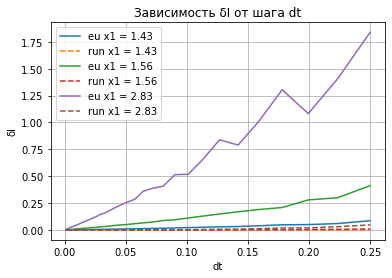

In [10]:
def EulerLankaster(A, u0, dt):
    res = np.reshape(u0, (2, 1))
    t = np.array([0])
    y = np.array(u0)
    B = np.eye(2) - dt * A
    # i = 0
    while y[0] > 0 and y[1] > 0:
        y = np.linalg.solve(B, y)
        res = np.hstack((res, np.reshape(y, (2, 1))))
        #t = np.hstack((t, np.array([dt * i])))
        # i += 1
    return res


def RungeKuta2nd(A, u0, dt):
    res = np.reshape(u0, (2, 1))
    y = np.array(u0)
    t = np.array([0])
    # i = 0
    while y[0] > 0 and y[1] > 0:
        k1 = dt * A @ y
        k2 = dt * A @ (k1 + y)
        y = y + 0.5 * (k1 + k2)
        res = np.hstack((res, np.reshape(y, (2, 1))))
        # t = np.hstack((t, np.array([dt * i])))
        # i += 1
    return res


def EulerHelp(A, u0):
    Er = np.array([])
    for dt in Dt:
        x1 = EulerLankaster(A, u0, dt)[0][-1]
        x2 = EulerLankaster(A, u0, dt)[1][-1]
        x10 = EulerLankaster(A, u0, dt)[0][0]
        x20 = EulerLankaster(A, u0, dt)[1][0]
        er = abs(x1**2 - 2*(x2)**2 - x10**2 + 2 * (x20)**2)
        Er = np.hstack((Er, er))
    return Er


def RungeHelp(A, u0):
    Er = np.array([])
    for dt in Dt:
        x1 = RungeKuta2nd(A, u0, dt)[0][-1]
        x2 = RungeKuta2nd(A, u0, dt)[1][-1]
        x10 = RungeKuta2nd(A, u0, dt)[0][0]
        x20 = RungeKuta2nd(A, u0, dt)[1][0]
        er = abs(x1**2 - 2*(x2)**2 - x10**2 + 2 * (x20)**2)
        Er = np.hstack((Er, er))
    return Er


A = np.array([[0, -2], [-1, 0]])

Dt = np.logspace(-10, -2, 50, base = 2)
plt.figure()

u0 = [1.43, 1]
plt.plot(Dt, EulerHelp(A, u0), '-', label='eu x1 = 1.43')
plt.plot(Dt, RungeHelp(A, u0), "--", label="run x1 = 1.43")

u0 = [1.56, 1]
plt.plot(Dt, EulerHelp(A, u0), '-', label='eu x1 = 1.56')
plt.plot(Dt, RungeHelp(A, u0), "--", label="run x1 = 1.56")

u0 = [2.83, 1]
plt.plot(Dt, EulerHelp(A, u0), '-', label='eu x1 = 2.83')
plt.plot(Dt, RungeHelp(A, u0), "--", label="run x1 = 2.83")

plt.title('Зависимость δI от шага dt')
plt.xlabel('dt')
plt.ylabel('δI')
plt.legend(loc='best')
plt.grid(True)

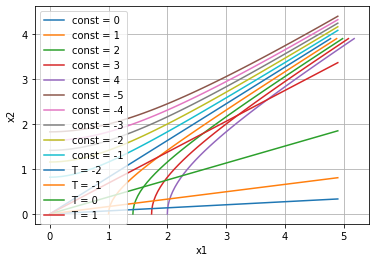

In [11]:
x2 = np.arange(0, 4, 0.1)
plt.figure()
for i in np.arange(0, 5, 1):
    x1 = (i + 1.5 * x2**2) ** (0.5)
    plt.plot(x1, x2, label = 'const = ' f"{i}")
x1 = np.arange(0, 5, 0.1)
for i in np.arange(-5, 0, 1):
    x2 = ((2 / 3) * (x1**2 - i))**0.5
    plt.plot(x1, x2, label = 'const = ' f"{i}")
for T in np.arange(-2, 2, 1):
    x2 = (2 / 3)**(0.5) * x1 * (np.exp(6**(0.5 * T)) - 1) / (1 + np.exp(6 ** (0.5 * T)))
    plt.plot(x1, x2, label = 'T = ' f"{T}")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc='best')
plt.grid(True)